In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as nn
import sklearn

In [2]:
def reader(file_name):
    list_obj = list()
    with open(file_name, 'r') as fd_file:
        i = 0;
        for line in fd_file:
            line = line.split()
            coords = np.zeros(shape=(3,))
            coords[0] = float(line[0])
            coords[1] = float(line[1])
            coords[2] = float(line[2])
            i += 1
            list_obj.append(coords)            
    return np.array(list_obj)

In [3]:
mas = reader('r 0.05 0.075 xyz.txt')

In [78]:
n_neighbours = 7

In [79]:
nbrs = nn(n_neighbors=n_neighbours+1, algorithm='ball_tree').fit(mas)
dist, ind = nbrs.kneighbors(mas)


In [80]:
dist_to_4 = dist[:,n_neighbours]

In [81]:
dist_to_4.shape

(123930,)

In [82]:
dist_to_4[dist_to_4.argsort()][-100:]

array([ 12.20613422,  12.29148325,  12.34028622,  12.35073331,
        12.4649544 ,  12.53843145,  12.56746929,  12.63842564,
        12.66453897,  12.71777841,  12.73304869,  12.81028978,
        12.85243428,  12.90023406,  12.91590667,  12.94419095,
        13.04902964,  13.04992788,  13.11756919,  13.21200591,
        13.27271102,  13.34655259,  13.34708752,  13.36945178,
        13.42923786,  13.45963845,  13.49454547,  13.51024018,
        13.59925429,  13.6431393 ,  13.72718601,  13.7277689 ,
        13.77668371,  13.92069372,  13.9543895 ,  14.02823128,
        14.04009339,  14.08224775,  14.09260069,  14.12369914,
        14.19862498,  14.29573025,  14.40885672,  14.61954608,
        14.6857315 ,  14.69074509,  14.71448392,  14.90731846,
        14.91294871,  14.9642512 ,  15.0987313 ,  15.10672053,
        15.26968896,  15.28689095,  15.29300479,  15.29300479,
        15.32661283,  15.41704052,  15.63996995,  15.67575296,
        15.71485972,  15.79285152,  16.34028029,  16.83

In [83]:
tmp = dist_to_4[dist_to_4.argsort()][:-100]

In [84]:
np.median(tmp)

2.1782624541763074

In [85]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(tmp[tmp<8])

In [86]:
fit_alpha, fit_loc, fit_beta = stats.alpha.fit(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [40]:
a, b, loc, scale = stats.beta.fit(tmp) # 3, 2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [41]:
print(a, b, loc, scale)

2.8181575032969466 24797085488.154694 0.20045274957319104 15106441872.568466


In [87]:
print(fit_alpha, fit_loc, fit_beta)

4.298788884046678 -2.248621379711717 19.016732884237342


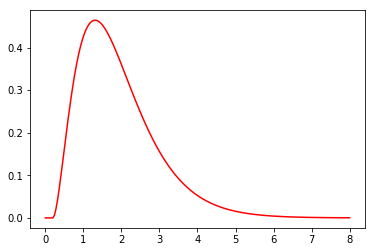

In [88]:
x = np.linspace(0, 8, 200)
pdf_fitted = stats.beta.pdf(x, a, b, loc, scale)
plt.plot(x, pdf_fitted, color='r')

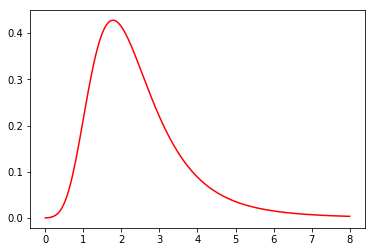

In [94]:

x = np.linspace(0, 8, 200)
pdf_fitted = stats.alpha.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)
plt.plot(x, pdf_fitted, color='r')


In [289]:
pdf_fitted[pdf_fitted<120]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 106.78259298,  94.26205731,  84.38915235,
        76.40264865,  69.80788916,  64.26943342,  59.55173346,
        55.48450442,  51.94157212,  48.82744987,  46.06853768,
        43.60718714,  41.39759911,  39.40292602,  37.59318522,
        35.94373028,  34.43411359,  33.04722804,  31.76865119,
        30.58613805,  29.48922484,  28.46891622,  27.51743623,
        26.62802828,  25.79479329,  25.01255774,  24.27676533,
        23.58338757,  22.92884939,  22.30996711,  21.72389618,
        21.16808725,  20.64024875,  20.13831509,  19.66

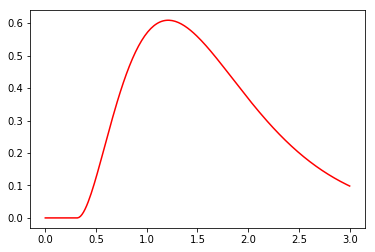

In [354]:
x = np.linspace(0, 3, 200)
pdf_fitted = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, pdf_fitted, color='r')

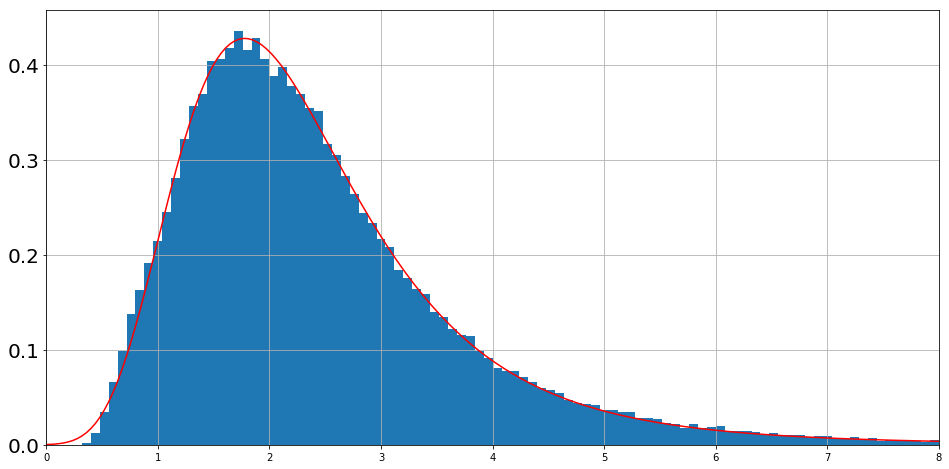

In [95]:
fig = plt.figure(figsize=(16, 8))
#plt.xticks(np.arange(0, 8, step=0.05), fontsize=10)
plt.yticks(fontsize=20)

plt.xlim(0, 8)

num = plt.hist(tmp, 100, [0, 8], density=True)
plt.plot(x, pdf_fitted, color='r')
plt.grid(True)

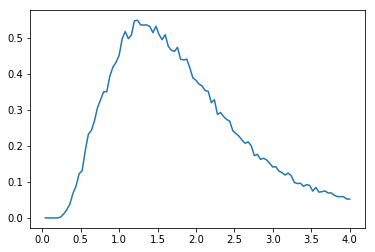

In [152]:
plt.plot(num[1][1:], num[0])

In [96]:
dbscan_model = DBSCAN(eps=0.75, min_samples=n_neighbours+1, metric='euclidean', algorithm='kd_tree')


In [97]:
res = dbscan_model.fit_predict(mas)

In [139]:
const_shift = 10

In [140]:
d = np.argmax(np.unique(res, return_counts=True)[1][const_shift:])

In [141]:
d+=const_shift-1

In [144]:
ar_show = mas[np.argwhere(res==d)]

In [145]:
ar_show[:,:,0]

array([[229.61727389],
       [229.53276064],
       [229.99085655],
       [228.22168413],
       [227.9474284 ],
       [230.84405026],
       [227.74404897],
       [225.35485125],
       [225.22935759],
       [221.83477882],
       [222.25489344],
       [221.44778851],
       [227.07649346],
       [227.0852822 ],
       [226.63835687],
       [227.42480354],
       [225.1616834 ],
       [224.53231885],
       [226.80697556],
       [227.0014051 ],
       [228.16974742],
       [229.80570497],
       [223.88920211],
       [223.67650149],
       [222.73649746],
       [231.79449479],
       [223.85366126],
       [228.8880144 ],
       [228.4445357 ],
       [227.47724341],
       [227.71563786],
       [230.51479065],
       [230.78682505],
       [231.22334927],
       [221.89761453],
       [229.16382308],
       [229.94951084],
       [224.03088684],
       [230.60649568],
       [229.58769078],
       [229.23099639],
       [231.0665832 ],
       [231.16621505],
       [231

In [156]:
np.unique(res, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

<IPython.core.display.Javascript object>


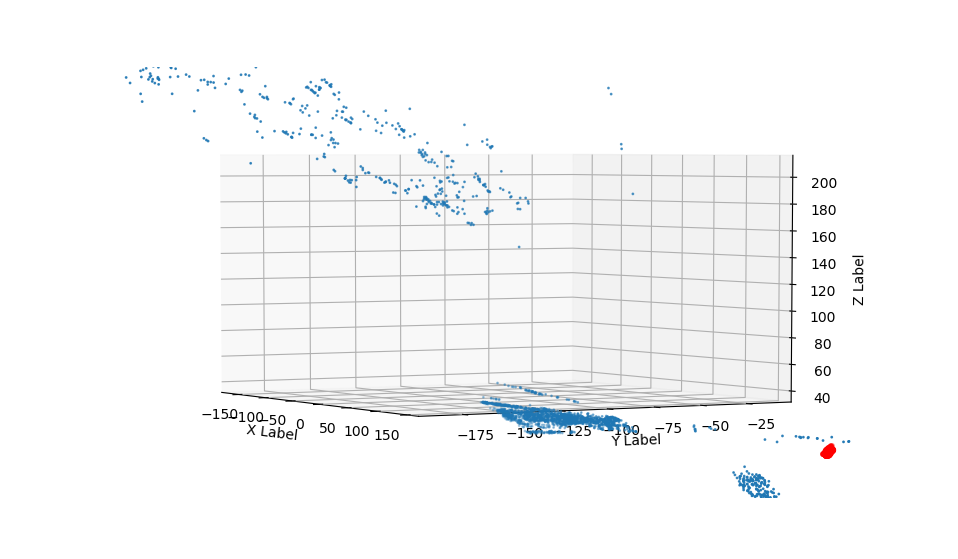

In [154]:
%matplotlib notebook


#fig = plt.figure(figsize=(5, 5))
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(mas[:3000,0], mas[:3000,1], mas[:3000,2], s=1)
ax.scatter(ar_show[:,:,0], ar_show[:,:,1], ar_show[:,:,2], s=10, c='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()